In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import numpy as np
import import_ipynb
import basefile as bf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.linear_model import LogisticRegression


importing Jupyter notebook from basefile.ipynb


In [5]:
def stacking_C(L_0ms, L_1m, methodology, X_train, y_train, X_val, y_val, X_test, y_test):
    num_ms_l0 = len(L_0ms) #
    models = []
    for i in range(num_ms_l0):
        model = L_0ms[i]
        model.fit(X_train, y_train)
        models.append(model)
    if methodology == 'BLEND':                          # we are using train set to train L_1m
        # predictions = []
        # for i in range(num_ms_l0):
        #     predictions.append(models[i].predict(X_test))
        # predictions = np.array(predictions)
        # predictions = np.round(np.mean(predictions, axis=0))
        # return predictions # essentially model over all the data is assumed perfect 
        predictions = []
        for i in range(num_ms_l0):
            predictions.append(models[i].predict(X_test))
        predictions = np.array(predictions)
        vals = []
        for i in range(num_ms_l0):
            vals.append(models[i].predict(X_test))
        vals = np.array(vals)
        vals = vals.reshape(-1, 1)
        L_1m.fit(vals, y_val.values.ravel())
        final_predictions = L_1m.predict(predictions.reshape(-1, 1))
        final_predictions = np.round(final_predictions)
        return final_predictions
    
    elif methodology == 'STACK':                                # same as BLEND but with validation set to train L_1m
        predictions = []
        for i in range(num_ms_l0):
            predictions.append(models[i].predict(X_test))
        predictions = np.array(predictions)
        vals = []
        for i in range(num_ms_l0):
            vals.append(models[i].predict(X_val))
        vals = np.array(vals)
        vals = vals.reshape(-1, 1)
        L_1m.fit(vals, y_val.values.ravel())
        final_predictions = L_1m.predict(predictions.reshape(-1, 1))
        final_predictions = np.round(final_predictions)
        return final_predictions

In [6]:
data = pd.read_csv('data/WineQT.csv')
data = data.drop(columns=['Id'])
X = data.drop(columns=['quality'])
y = data['quality']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6666, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

L0 model 0 L1 model 0 methodology BLEND accuracy 0.5697674418604651
L0 model 1 L1 model 0 methodology BLEND accuracy 0.42441860465116277
L0 model 2 L1 model 0 methodology BLEND accuracy 0.6046511627906976
L0 model 0 L1 model 1 methodology BLEND accuracy 0.5813953488372093
L0 model 1 L1 model 1 methodology BLEND accuracy 0.42441860465116277
L0 model 2 L1 model 1 methodology BLEND accuracy 0.6046511627906976


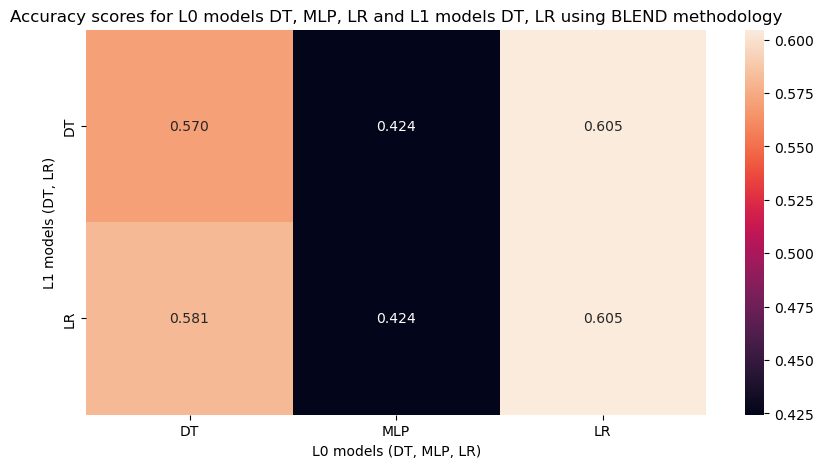

L0 model 0 L1 model 0 methodology STACK accuracy 0.563953488372093
L0 model 1 L1 model 0 methodology STACK accuracy 0.45930232558139533
L0 model 2 L1 model 0 methodology STACK accuracy 0.6046511627906976
L0 model 0 L1 model 1 methodology STACK accuracy 0.4011627906976744
L0 model 1 L1 model 1 methodology STACK accuracy 0.4011627906976744
L0 model 2 L1 model 1 methodology STACK accuracy 0.4011627906976744


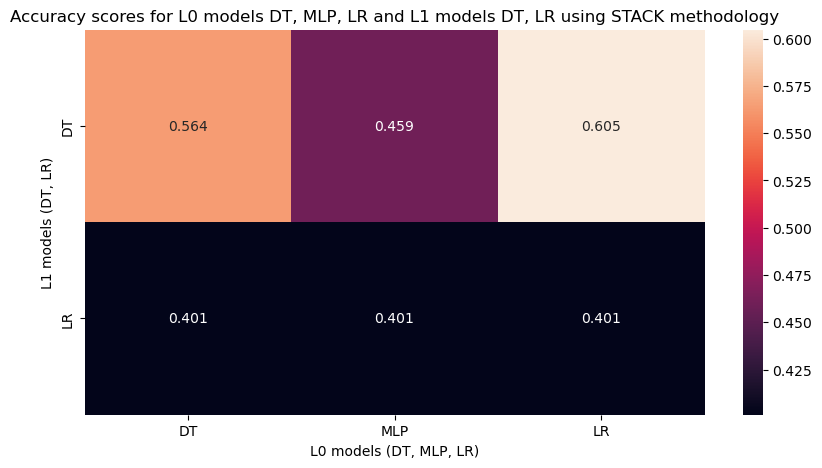

Best accuracy scores for L0 models DT, MLP, LR [0.58139535 0.45930233 0.60465116]


In [7]:
data = pd.read_csv('data/WineQT.csv')
data = data.drop(columns=['Id'])
X = data.drop(columns=['quality'])
y = data['quality']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6666, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
n = 50
L_0ms = [[DecisionTreeClassifier()], 
        [bf.MLPClassifier(input_size=X.shape[1], hidden_layers=[10, 5], learning_rate=0.01, activation='sigmoid', epoch = 100)], 
        [bf.MultinomialLogisticRegression(learning_rate = 0.1, max_iter = 2000)]]
L_1m = [DecisionTreeClassifier(), bf.MultinomialLogisticRegression(learning_rate = 0.001, max_iter = 200)]
methodology = ['BLEND', 'STACK']

L0_acc = np.zeros(len(L_0ms))

for j in range(len(methodology)): 
    accuracy_scores = np.zeros((len(L_1m), len(L_0ms)))
    for k in range(len(L_1m)):
        for i in range(len(L_0ms)):
            predictions = stacking_C(L_0ms[i], L_1m[k], methodology[j], X_train, y_train, X_val, y_val, X_test, y_test)
            accuracy = accuracy_score(y_test, predictions)
            accuracy_scores[k, i] = accuracy
            if accuracy > L0_acc[i]:
                L0_acc[i] = accuracy
            print('L0 model', i, 'L1 model', k, 'methodology', methodology[j], 'accuracy', accuracy)
    plt.figure(figsize=(10, 5))
    sns.heatmap(accuracy_scores, annot=True, fmt='.3f', xticklabels=['DT', 'MLP', 'LR'], yticklabels=['DT', 'LR'])
    plt.xlabel('L0 models (DT, MLP, LR)')
    plt.ylabel('L1 models (DT, LR)')
    plt.title('Accuracy scores for L0 models DT, MLP, LR and L1 models DT, LR using ' + methodology[j] + ' methodology')
    plt.show()
print('Best accuracy scores for L0 models DT, MLP, LR', L0_acc)

In [43]:
def stacking_reg(L_0m, L_1m, methodology, X_train, y_train, X_val, y_val, X_test, y_test): 
    num_m_l0 = len(L_0m) 
    mods = []
    for i in range(num_m_l0):
        mod = L_0m[i]
        mod.fit(X_train, y_train)
        mods.append(mod)
    if methodology == 'BLEND':                                  # we are using train set to train L_1m
        valss = []
        predss = []
        for i in range(num_m_l0):
            valss.append(mods[i].predict(X_test))
            predss.append(mods[i].predict(X_test).flatten())
        valss = np.array(valss)
        valss = np.transpose(valss)
        predss = np.array(predss)
        predss = np.transpose(predss)
        # print(valss.shape, predss.shape)
        # print(y_test.shape, y_train.shape)
        L_1m.fit(predss, y_train)
        final_predss = L_1m.predict(predss)
        return final_predss
    
    elif methodology == 'STACK':                              # same as BLEND but with validation set to train L_1m
        valss = []
        predss = []
        for i in range(num_m_l0):
            valss.append(mods[i].predict(X_val).flatten())
            predss.append(mods[i].predict(X_test).flatten())
        valss = np.array(valss)
        valss = np.transpose(valss)
        predss = np.array(predss)
        predss = np.transpose(predss)
        L_1m.fit(valss, y_val)
        final_predss = L_1m.predict(predss)
        return final_predss

In [44]:
data = pd.read_csv('data/HousingData.csv')
data.fillna(data.mean(), inplace=True)
X = data.drop(columns=['MEDV'])
y = data['MEDV']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.666, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

L0 model 0 L1 model 0 methodology BLEND MSE 135.51918244575938
L0 model 1 L1 model 0 methodology BLEND MSE 179.66266272189347
L0 model 2 L1 model 0 methodology BLEND MSE 179.66266272189347
L0 model 0 L1 model 1 methodology BLEND MSE 31.000763037523612
L0 model 1 L1 model 1 methodology BLEND MSE 38.427757527283205
L0 model 2 L1 model 1 methodology BLEND MSE 37.62948489055253


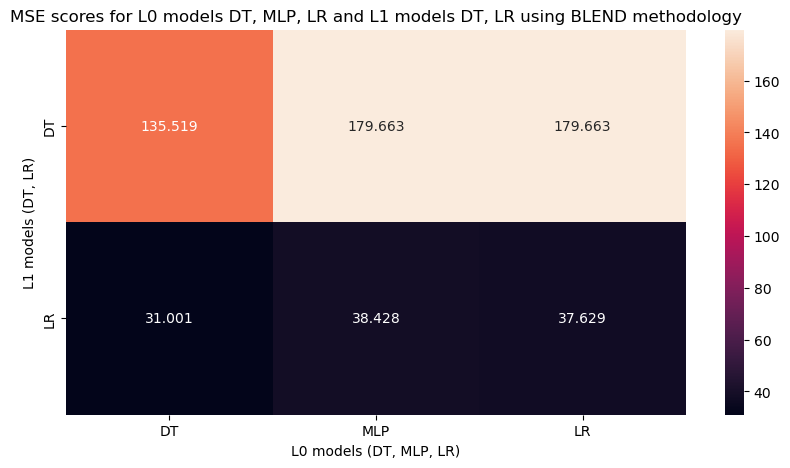

L0 model 0 L1 model 0 methodology STACK MSE 25.89383900394477
L0 model 1 L1 model 0 methodology STACK MSE 53.67455621301775
L0 model 2 L1 model 0 methodology STACK MSE 35.165502958579886
L0 model 0 L1 model 1 methodology STACK MSE 24.86465789925216
L0 model 1 L1 model 1 methodology STACK MSE 36.67096628346357
L0 model 2 L1 model 1 methodology STACK MSE 32.113605488234555


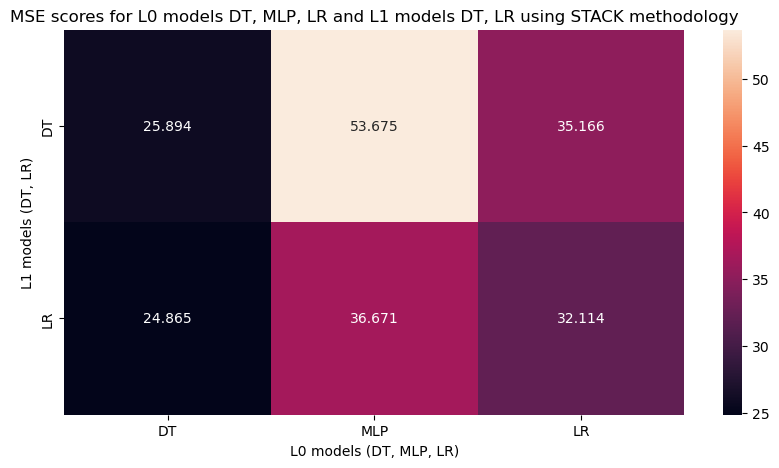

Best MSE scores for L0 models DT, MLP, LR [24.8646579  36.67096628 32.11360549]


In [46]:
data = pd.read_csv('data/HousingData.csv')
data.fillna(data.mean(), inplace=True)
X = data.drop(columns=['MEDV'])
y = data['MEDV']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.666, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
n = 50
L_0ms = [[DecisionTreeRegressor()], 
        [bf.MLPRegressor(input_size=X.shape[1], hidden_layers=[10, 15], learning_rate=0.01, activation='tanh', epoch = 2000)], 
        [bf.LinearRegression(learning_rate = 0.1, n_iterations = 2000)]]
L_1m = [DecisionTreeRegressor(), bf.LinearRegressionCustom()]
methodology = ['BLEND', 'STACK']

L0_acc = np.inf*np.ones(len(L_0ms))
for j in range(len(methodology)):
    accuracy_scores = np.zeros((len(L_1m), len(L_0ms)))
    for k in range(len(L_1m)):
        for i in range(len(L_0ms)):
            predictions = stacking_reg(L_0ms[i], L_1m[k], methodology[j], X_train, y_train, X_val, y_val, X_test, y_test)
            accuracy = mean_squared_error(y_test, predictions)
            accuracy_scores[k, i] = accuracy
            if accuracy < L0_acc[i]:
                L0_acc[i] = accuracy
            print('L0 model', i, 'L1 model', k, 'methodology', methodology[j], 'MSE', accuracy)
    plt.figure(figsize=(10, 5))
    sns.heatmap(accuracy_scores, annot=True, fmt='.3f', xticklabels=['DT', 'MLP', 'LR'], yticklabels=['DT', 'LR'])
    plt.xlabel('L0 models (DT, MLP, LR)')
    plt.ylabel('L1 models (DT, LR)')
    plt.title('MSE scores for L0 models DT, MLP, LR and L1 models DT, LR using ' + methodology[j] + ' methodology')
    plt.show()
print('Best MSE scores for L0 models DT, MLP, LR', L0_acc)

Compare the performance of each model in List 1 models with the best- performing stacking blending model of the same class with a single side-by-side histogram

Best MSE scores for L0 models DT, MLP, LR [24.8646579  36.67096628 32.11360549]

for MSE in MLP regression
Best mse:  82.8746052631579

mse LR
Best loss:  15.408819875945705

DT
Best MSE:  10.629210526315788


Best accuracy scores for DT, MLP, LR [0.58139535 0.45930233 0.60465116]
classification LR 
Best accuracy:  0.6666666666666666

classification DT
Best accuracy:  0.6374269005847953

classification MLP 
Best accuracy:  0.58

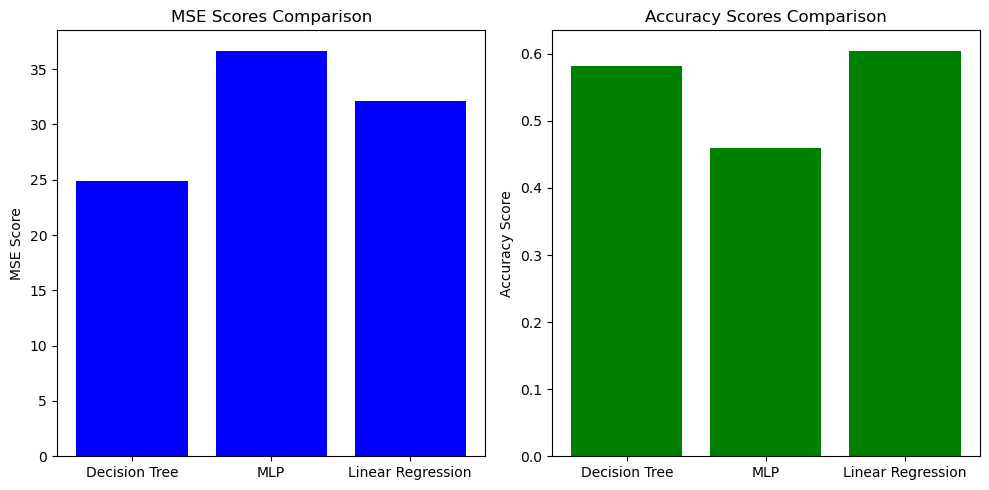

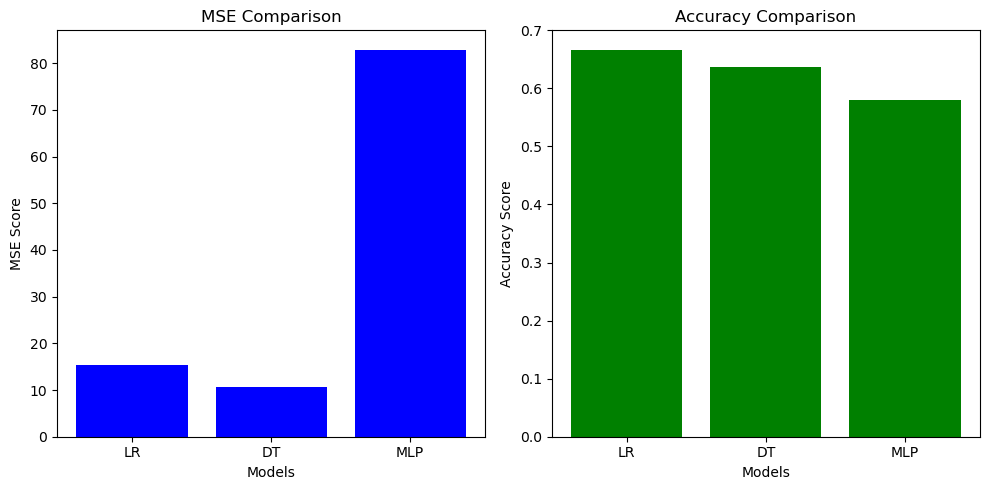

In [50]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Decision Tree', 'MLP', 'Linear Regression']
mse_scores = [24.8646579, 36.67096628, 32.11360549]
accuracy_scores = [0.58139535, 0.45930233, 0.60465116]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color='blue')
plt.title('MSE Scores Comparison')
plt.ylabel('MSE Score')
plt.subplot(1, 2, 2)
plt.bar(models, accuracy_scores, color='green')
plt.title('Accuracy Scores Comparison')
plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.show()

models = ['LR', 'DT', 'MLP']
mse_scores = [15.408819875945705, 10.629210526315788, 82.8746052631579]
accuracy_scores = [0.6666666666666666, 0.6374269005847953, 0.58]
ind = np.arange(len(models))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(ind, mse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.title('MSE Comparison')
plt.xticks(ind, models)
plt.subplot(1, 2, 2)
plt.bar(ind, accuracy_scores, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison')
plt.xticks(ind, models)
plt.tight_layout()
plt.show()


Blending and stacking are ensemble learning techniques that combine the predictions of multiple base models to improve overall performance. Here are some key observations for both blending and stacking:

### Blending:

1. **Separation of Training and Prediction Phases:**
   - In blending, the training of base models and the learning of the meta-model (level-1 model) are done separately.
   - Base models are trained on the training set, and their predictions on the validation set are used to train the meta-model.

2. **Weighted Averaging:**
   - Blending often involves a simple weighted averaging of predictions from different models.
   - Weights can be assigned based on the performance or confidence of individual base models.

3. **Ease of Implementation:**
   - Blending is relatively straightforward to implement and doesn't require complex stacking configurations.
   - It's a good starting point for ensemble learning and is easy to interpret.

### Stacking:

1. **Two-Phase Learning:**
   - Stacking involves a two-phase learning process: base models are first trained individually, and then a meta-model is trained on their predictions.
   - This allows the meta-model to learn how to best combine the predictions of base models.

2. **Hierarchical Model Structure:**
   - Stacking introduces a hierarchical structure with multiple levels of models.
   - Level-0 models (base models) make predictions on the training set, and their outputs become inputs for the level-1 model (meta-model).

3. **Model Diversity:**
   - Stacking encourages the use of diverse base models to capture different aspects of the data.
   - Diversity is important for improving generalization and robustness.

4. **Potential for Complex Configurations:**
   - Stacking allows for more complex configurations, such as using different algorithms at each level or having multiple stacking layers.
   - This flexibility can lead to more sophisticated ensemble models.

### General Observations:

1. **Performance Improvement:**
   - Both blending and stacking aim to improve overall model performance compared to individual base models.
   - The degree of improvement depends on factors like model diversity, quality of base models, and dataset characteristics.

2. **Robustness:**
   - Ensemble methods, including blending and stacking, often exhibit increased robustness against overfitting and noise in the data.

3. **Model Selection:**
   - The choice of base models significantly influences the success of blending and stacking.
   - Experimenting with various combinations of models and hyperparameters is crucial for finding the best-performing ensemble.

4. **Computational Complexity:**
   - Stacking, with its two-phase learning process, may be computationally more expensive than blending.
   - Blending can be a computationally lighter alternative when resources are limited.

5. **Interpretability:**
   - Blending is generally more interpretable, as it involves simpler combinations of model predictions.
   - Stacking, with its hierarchical structure, might be more challenging to interpret.

In practice, the choice between blending and stacking depends on the specific characteristics of the problem, the available data, and computational resources. It's often beneficial to experiment with both techniques to determine which works best for a given scenario.
Co auth GPT AI
----